# Antara Project
## Importing libraries

In [6]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import duckdb  # DuckDB for querying data efficiently

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
!pwd
#Upload the data

# con.execute("""
#     CREATE TABLE IF NOT EXISTS tracker AS
#     SELECT * FROM read_csv('/content/datasets/tracker/campaign_trackers - week_1.csv')
# """)
# con.execute("SHOW ALL TABLES").fetchdf()


# con.execute("""
#     CREATE TABLE IF NOT EXISTS tracker AS
#     SELECT * FROM read_('/content/datasets/tracker/campaign_trackers - week_2.tsv')
# """)
# con.execute("SHOW ALL TABLES").fetchdf()

#con = duckdb.connect("antara.duckdb")
#with duckdb.connect("antara.duckdb") as db:
 # db.sql("CREATE TABLE trackers AS SELECT * FROM read_csv_auto('campaign_trackers - week_1.csv')")
#campaign_week1
#campaign_week2
#campaign_week3
#campaign_week4
#Map Tracker to respective reports

#Merge the data to a single dataFarame

#Check datatypes: message_status to be categorical
#df= df[message_status].astype('category')
#New columns: Extract number from user_attributes (name,phone_number,user_id,organization)




/Users/paulineoriko/documents/github/antara_assessment


NameError: name 'con' is not defined

## Read and merge campaign tracker files.

In [12]:
import os
import pandas as pd

# Directory where your files are located
directory_path = '/Users/paulineoriko/documents/github/antara_assessment/data/campaign_trackers'

# Initialize an empty list to hold the dataframes
dataframes = []

# Loop through the files in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)

    # Check the file extension and load the file accordingly
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_name.endswith('.tsv'):
        df = pd.read_csv(file_path, sep='\t')
    elif file_name.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        continue  # Skip if the file is not a supported format

    # Append the dataframe to the list
    dataframes.append(df)

# Combine all the dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True).dropna().reset_index(drop=True)

# Display or work with the combined DataFrame
combined_df.head(10)  # Preview the first few rows


,campaign_id,campaign_cohort,campaign_report_csv,campaign_sent_at
0,3.0,chronic__general_facts,2638_2638_campaigns_c27_experiment_m33__diabet...,2024-04-15T06:00:00.000000+00:00
1,1.0,chronic__motivational_message,2638_2638_campaigns_c27_experiment_m31__diabet...,2024-04-01T06:00:00.000000+00:00
2,4.0,chronic__general_facts,2638_2638_campaigns_c27_experiment_m34__diabet...,2024-04-29T06:00:00.000000+00:00
3,2.0,chronic__motivational_message,2638_2638_campaigns_c27_experiment_m32__diabet...,2024-04-08T06:00:00.000000+00:00


## Read and merger report files.

In [17]:
import os
import pandas as pd

# Path to your directory
directory_path = '/Users/paulineoriko/documents/github/antara_assessment/data/campaign_reports'

# Initialize an empty list to store individual DataFrames
dataframes = []

# Loop through the files in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)

    # Load the CSV files into DataFrames (assuming all files are CSVs)
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path)
        dataframes.append(df)

        df['campaign_report_csv'] = file_name

# Combine all DataFrames into one
reports_df = pd.concat(dataframes, ignore_index=True)
reports_df.head()

,message_id,user_attributes,message_status,message_delivery_failure_reason,campaign_report_csv
0,8340090,"{""whatsapp_display_name"": ""Michael Scott""}, {""...",responded,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...
1,8340088,"{""whatsapp_display_name"": ""Dwight Schrute""}, {...",read,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...
2,8340082,"{""whatsapp_display_name"": ""Jim Halpert""}, {""wh...",responded,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...
3,8340084,"{""whatsapp_display_name"": ""Pam Beesly""}, {""wha...",delivered,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...
4,8340086,"{""whatsapp_display_name"": ""Ryan Howard""}, {""wh...",read,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...


## Merge tracker and report to one DataFrame.

In [22]:
# Merge the combined DataFrame with the metadata DataFrame on `campaign_report_csv`
final_df = pd.merge(reports_df, combined_df, on='campaign_report_csv', how='left')

# Preview the final DataFrame
final_df.head()

,message_id,user_attributes,message_status,message_delivery_failure_reason,campaign_report_csv,campaign_id,campaign_cohort,campaign_sent_at
0,8340090,"{""whatsapp_display_name"": ""Michael Scott""}, {""...",responded,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00
1,8340088,"{""whatsapp_display_name"": ""Dwight Schrute""}, {...",read,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00
2,8340082,"{""whatsapp_display_name"": ""Jim Halpert""}, {""wh...",responded,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00
3,8340084,"{""whatsapp_display_name"": ""Pam Beesly""}, {""wha...",delivered,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00
4,8340086,"{""whatsapp_display_name"": ""Ryan Howard""}, {""wh...",read,NaN,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00


## Data cleaning

In [18]:
# function to parse_json data
def parse_json(row):
    json_items = row.split('}, ')  # Split each key-value pair
    parsed_data = {}

    for item in json_items:
        item = item.replace('{', '').replace('}', '')  # Remove curly braces
        key, value = item.split(': ')  # Split into key and value
        key = key.strip('"')  # Remove any extra quotes from the key
        value = value.strip('"')  # Remove any extra quotes from the value
        parsed_data[key] = value  # Add to dictionary

    return parsed_data

In [20]:
# Apply the function to the column
parsed_columns = df['user_attributes'].apply(parse_json)
df_parsed_json = pd.json_normalize(parsed_columns)
combined_df = pd.concat([final_df, df_parsed_json], axis=1)

## Create a Table and insert data to Duckdb.

In [26]:
con = duckdb.connect("antara.duckdb")
# Insert the DataFrame into the database
con.execute("CREATE TABLE IF NOT EXISTS campaigns AS SELECT * FROM combined_df")

## Querying database.

In [28]:
campaigns_table = con.execute("SELECT * FROM campaigns").fetchdf()

campaigns_table.head()



,message_id,user_attributes,message_status,message_delivery_failure_reason,campaign_report_csv,campaign_id,campaign_cohort,campaign_sent_at,whatsapp_display_name,whatsapp_phone_number,user_id,organization
0,8340090,"{""whatsapp_display_name"": ""Michael Scott""}, {""...",responded,None,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00,Michael Scott,254722001001,DM-001,Dunder Mifflin
1,8340088,"{""whatsapp_display_name"": ""Dwight Schrute""}, {...",read,None,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00,Dwight Schrute,254722001002,DM-002,Dunder Mifflin
2,8340082,"{""whatsapp_display_name"": ""Jim Halpert""}, {""wh...",responded,None,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00,Jim Halpert,254722001003,DM-003,Dunder Mifflin
3,8340084,"{""whatsapp_display_name"": ""Pam Beesly""}, {""wha...",delivered,None,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00,Pam Beesly,254722001004,DM-004,Dunder Mifflin
4,8340086,"{""whatsapp_display_name"": ""Ryan Howard""}, {""wh...",read,None,2638_2638_campaigns_c27_experiment_m34__diabet...,4.0,chronic__general_facts,2024-04-29T06:00:00.000000+00:00,Ryan Howard,254722001005,DM-005,Dunder Mifflin


## Generating a csv file

In [37]:
campaigns_table.to_csv('antara_combined.csv', encoding='utf-8', index=False)

## Funnel visualization.

In [59]:
#Generating a funnel
message_status_df= con.execute("SELECT message_status,COUNT(message_status) AS statues FROM campaigns_table GROUP BY ROLLUP (message_status)  ").fetchdf()
message_status_df

,message_status,statues
0,None,160
1,responded,63
2,invalid_user,8
3,read,64
4,delivered,25


In [68]:
#Generating a funnel
#message_status_df= con.execute("SELECT message_status,COUNT(message_status) AS statues FROM campaigns_table GROUP BY ROLLUP (message_status)  ").fetchdf()
#message_status_df

def calculate_funnel_from_status(campaigns_table):
    # Calculate counts for each status
    counts = campaigns_table['message_status'].value_counts()

    # Extract counts, defaulting to 0 if the status is missing
    sent_count = len(campaigns_table)
    invalid_user_count = counts.get('invalid_user', 0)
    delivered_remaining = counts.get('delivered', 0)
    read_remaining = counts.get('read', 0)
    responded_remaining = counts.get('responded', 0)
# conversions ??
    # Calculate funnel stages
    delivered_count = sent_count - invalid_user_count
    #delivered_perc = (sent_count - invalid_user_count)/sent_count
    read_count = delivered_count - delivered_remaining
    responded_count = read_count - read_remaining

    # Return the funnel dictionary
    return {
        'Sent': sent_count,
        'Delivered': delivered_count,
        'Read': read_count,
        'Responded': responded_count}



#def funnel_data():
#   funnel_list=[]

#   for status in message_status_df['message_status']:
 #   sent=None
  #  delivered = None - invalid_user
   # read = responded + read + 
   # responded = responded

    #return funnel_list

#funnel_data(message_status_df)


#fig=px.funnel(values)
#fig.show()



In [92]:
funnel=calculate_funnel_from_status(campaigns_table[campaigns_table.campaign_id== 4])

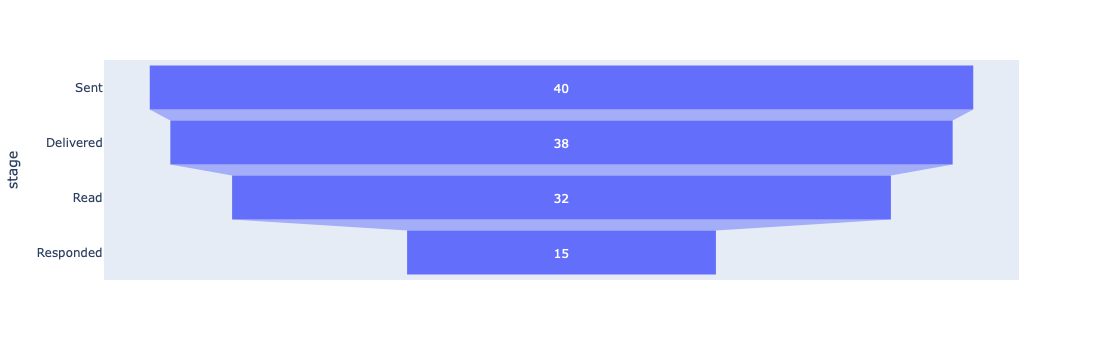

In [94]:
import plotly.express as px
data = dict(
    number= list(funnel.values()),
    stage= list(funnel.keys() ))
fig = px.funnel(data, x='number', y='stage')
fig.show()

In [56]:
funnel_stages

message_status
delivered    25
read         64
responded    63
Name: count, dtype: int64

## Histogram.

TypeError: 'value' must be an instance of str or bytes, not a None

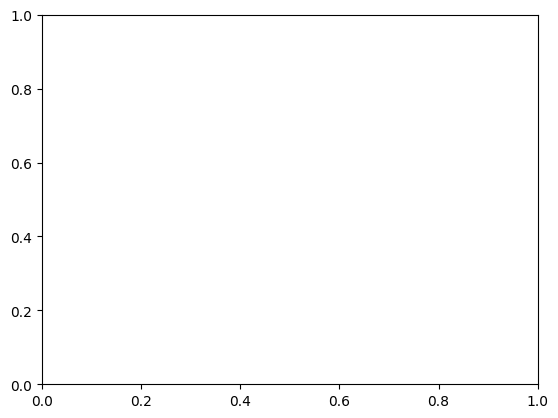

In [ ]:
#Generating a histogram. Count of responses for each ca
campaigns_table['message_status']=campaigns_table['message_status'].astype('category')
respondents_df =campaigns_table[campaigns_table['message_status'] == 'responded']

fig, ax=plt.subplots()
ax.hist(campaigns_table['user_id'], label='respondents' ,bin=[0,1,2,3,4,5,6])
ax.legend()
plt.show()




In [ ]:
combined_df.head()

,message_id,user_attributes,message_status,message_delivery_failure_reason,campaign_report_csv,campaign_id,campaign_cohort,campaign_sent_at,whatsapp_display_name,whatsapp_phone_number,user_id,organization
0,6734512,"{""whatsapp_display_name"": ""Michael Scott""}, {""...",read,NaN,2638_2638_campaigns_c27_experiment_m33__diabet...,3.0,chronic__general_facts,2024-04-15T06:00:00.000000+00:00,Michael Scott,254722001001,DM-001,Dunder Mifflin
1,6734510,"{""whatsapp_display_name"": ""Dwight Schrute""}, {...",responded,NaN,2638_2638_campaigns_c27_experiment_m33__diabet...,3.0,chronic__general_facts,2024-04-15T06:00:00.000000+00:00,Dwight Schrute,254722001002,DM-002,Dunder Mifflin
2,6734504,"{""whatsapp_display_name"": ""Jim Halpert""}, {""wh...",read,NaN,2638_2638_campaigns_c27_experiment_m33__diabet...,3.0,chronic__general_facts,2024-04-15T06:00:00.000000+00:00,Jim Halpert,254722001003,DM-003,Dunder Mifflin
3,6734506,"{""whatsapp_display_name"": ""Pam Beesly""}, {""wha...",delivered,NaN,2638_2638_campaigns_c27_experiment_m33__diabet...,3.0,chronic__general_facts,2024-04-15T06:00:00.000000+00:00,Pam Beesly,254722001004,DM-004,Dunder Mifflin
4,6734508,"{""whatsapp_display_name"": ""Ryan Howard""}, {""wh...",responded,NaN,2638_2638_campaigns_c27_experiment_m33__diabet...,3.0,chronic__general_facts,2024-04-15T06:00:00.000000+00:00,Ryan Howard,254722001005,DM-005,Dunder Mifflin
